In [1]:
import sys
# Assuming we are in the notebook directory add this so that we can import the library
sys.path.append('..')

import time

import numpy as np
import dask
from abcpy.core import *
from abcpy.distributions import *
from abcpy.examples.ma2 import *
from abcpy.methods import *
from abcpy.gp.acquisition import *
from abcpy.gp.gpy_model import *
from distributed import Client
from dask.dot import dot_graph
from functools import partial

import matplotlib
import matplotlib.pyplot as plt

#matplotlib.style.use('ggplot')
#%matplotlib inline


In [2]:
# Setup the local cluster
# client = Client()
# dask.set_options(get=client.get)

In [3]:
n = 1000
t1 = 0.6
t2 = 0.2

# Set up observed data y
latents = np.random.randn(n+2)
y = MA2(n, 1, t1, t2, latents=latents)

# Plot
if False:
    plt.figure(figsize=(11, 6))
    plt.plot(np.arange(0,n),y[0,:])
    plt.scatter(np.arange(-2,n), latents);

In [4]:
# Set up the simulator
simulator = partial(MA2, n)

# Set up autocovariance summaries
ac1 = partial(autocov, 1)
ac2 = partial(autocov, 2)

# Specify the graphical model
t1 = Prior('t1', 'uniform', 0, 1)
#t2 = Prior('t2', 'uniform', 0, 1)
Y = Simulator('MA2', simulator, t1, t2, observed=y)
S1 = Summary('S1', ac1, Y)
S2 = Summary('S2', ac2, Y)
d = Discrepancy('d', distance, S1, S2)

# Specify the number of simulations
N = 10

In [5]:
# Test GP model

gp = GPyModel(1)
acq = BolfiAcquisition(gp, None)

In [6]:
acq.acquire(1)

array([[ 0.33199408]])

In [7]:
bolfi = BOLFI(10, d, [t1], model=gp, acquisition=acq)
lik = bolfi.create_surrogate_likelihood()

GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters
GP - INFO - initializing Y
GP - INFO - initializing inference method
GP - INFO - adding kernel and likelihood as parameters
GP - INF

In [8]:
from IPython.display import display
display(lik.gp)

GP_regression.,value,constraints,priors
rbf.variance,31388.9533641,+ve,
rbf.lengthscale,5.56268464627e-309,+ve,
Gaussian_noise.variance,202.879984059,+ve,


 /home/lintusj1/.conda/envs/abc4py/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


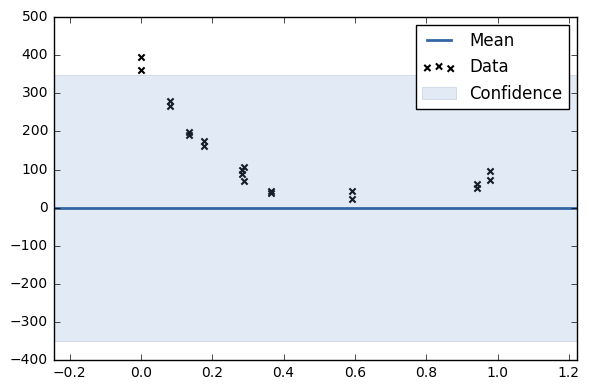

In [9]:
fig = lik.gp.plot()
GPy.plotting.show(fig)